Using the Pipe modduls is the simplest (it has nearly no code! The whole Pipe function is a few lines of python, just overloading the `|` operator)

In [25]:
import pipe
help(pipe)

Help on module pipe:

NAME
    pipe - Infix programming toolkit

FILE
    /Users/kosack/Library/Python/2.7/lib/python/site-packages/pipe.py

DESCRIPTION
    Module enabling a sh like infix syntax (using pipes).
    
    = Introduction =
    As an exemple, here is the solution for the 2nd Euler Project exercise :
    
    "Find the sum of all the even-valued terms in Fibonacci
     which do not exceed four million."
    
    Given fib a generator of fibonacci numbers :
    
    euler2 = fib() | where(lambda x: x % 2 == 0)
                   | take_while(lambda x: x < 4000000)
                   | add
    
    
    = Vocabulary =
     * a Pipe: a Pipe is a 'pipeable' function, somthing that you can pipe to,
               In the code '[1, 2, 3] | add' add is a Pipe
     * a Pipe function: A standard function returning a Pipe so it can be used like
               a normal Pipe but called like in : [1, 2, 3] | concat("#")
    
    
    = Syntax =
    The basic symtax is to use a Pipe like 

Works just like normal generators, but allows one to write it in a more clean way (using the | operator)

In [26]:
p = [1,2,3,3,3,3,4,3,1,1] \
    | pipe.tee | pipe.groupby(lambda x:x) 
    
print "===="
for element in p:
    print element[0],":",list(element[1])

1
2
3
3
3
3
4
3
1
1
====
1 : [1, 1, 1]
2 : [2]
3 : [3, 3, 3, 3, 3]
4 : [4]


In [27]:
xrange(1450) |  pipe.average

724.5

In [192]:
import fitsio
import pipe
from pipe import Pipe as pipeable
import itertools

def fitssource(filename, chunksize=10):
    data =  fitsio.FITS(filename, iter_row_buffer=1000)['EVENTS']
    count =0
    while True:
        chunk = data['EVENT_ID','RA','DEC'][count:count+chunksize]
        yield chunk
        count += chunksize
      
@pipeable
def averagepos(iterable):
    for chunk in iterable:
        yield dict(ra_mean=chunk['RA'].mean(),
                   ra_std=chunk['RA'].std(),
                   dec_mean=chunk['DEC'].mean(), 
                   dec_std=chunk['DEC'].std(),
                   n=len(chunk))
    

In [200]:
from pprint import pprint
chunksource = fitssource("run_00023559_eventlist.fits.gz",chunksize=100) 
p = chunksource | pipe.take(10) | averagepos 

for item in p:
    pprint( item )


{'dec_mean': 22.232903,
 'dec_std': 2.9736841,
 'n': 100,
 'ra_mean': 85.358582,
 'ra_std': 1.8049097}
{'dec_mean': 22.127573,
 'dec_std': 1.5561582,
 'n': 100,
 'ra_mean': 85.244736,
 'ra_std': 1.4214569}
{'dec_mean': 22.045893,
 'dec_std': 1.3095225,
 'n': 100,
 'ra_mean': 85.209618,
 'ra_std': 1.7598848}
{'dec_mean': 22.10047,
 'dec_std': 1.6558417,
 'n': 100,
 'ra_mean': 85.175789,
 'ra_std': 1.8644583}
{'dec_mean': 22.250872,
 'dec_std': 1.3442787,
 'n': 100,
 'ra_mean': 85.23703,
 'ra_std': 1.6761876}
{'dec_mean': 22.1551,
 'dec_std': 1.3746819,
 'n': 100,
 'ra_mean': 85.459152,
 'ra_std': 1.4694121}
{'dec_mean': 21.939436,
 'dec_std': 5.1028595,
 'n': 100,
 'ra_mean': 85.358131,
 'ra_std': 2.6540585}
{'dec_mean': 21.727184,
 'dec_std': 3.5937142,
 'n': 100,
 'ra_mean': 86.333015,
 'ra_std': 8.636467}
{'dec_mean': 22.116575,
 'dec_std': 2.1745694,
 'n': 100,
 'ra_mean': 84.814987,
 'ra_std': 4.9883966}
{'dec_mean': 21.74469,
 'dec_std': 5.1284442,
 'n': 100,
 'ra_mean': 85.434952

In [173]:
def dopipe(chunksize):
    chunksource = fitssource("run_00023559_eventlist.fits.gz",chunksize=chunksize) 
    p = chunksource | pipe.take(100) | averagepos
    for item in p:
        pass

In [171]:
import numpy as np
cs = []
tt = []
for ii in [1,10,50,100]:
    print ii
    res = %timeit -o dopipe(int(ii))
    cs.append(res.best)
    tt.append(ii)
    

1
10 loops, best of 3: 89.1 ms per loop
10
10 loops, best of 3: 84.3 ms per loop
50
10 loops, best of 3: 85.5 ms per loop
100
10 loops, best of 3: 84 ms per loop


Populating the interactive namespace from numpy and matplotlib


(0, 0.1)

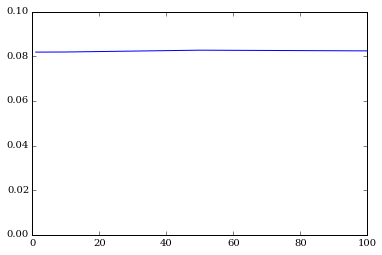

In [168]:
%pylab inline
plt.plot(tt,cs)
plt.ylim(0,0.1)
